In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#df = pd.read_csv (r'C:\Users\Mikayla\Desktop\Projects\Seattle-Housing-Analysis\kc_house_data.csv', header=0)
df = pd.read_csv (r'/Users/Mikayla/Desktop/Python_Projects/Seattle-Housing-Analysis/kc_house_data.csv', header=0)


df.shape

(21613, 21)

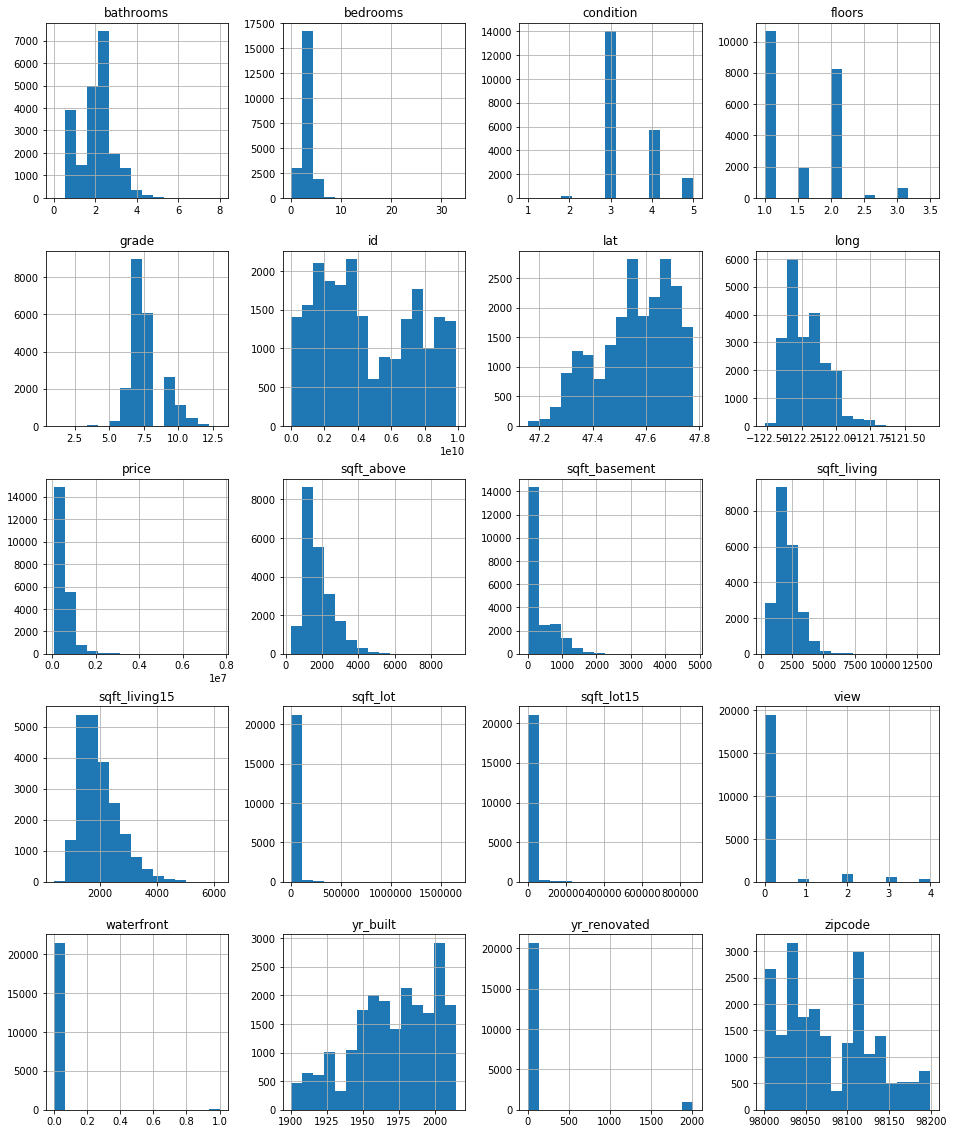

In [42]:
# Visualizing the data to gather ideas for relationships to investigate as well as look for any inconsistencies that stand out
hist = df.hist(bins=15,figsize=(16,20),xlabelsize='10',ylabelsize='10')

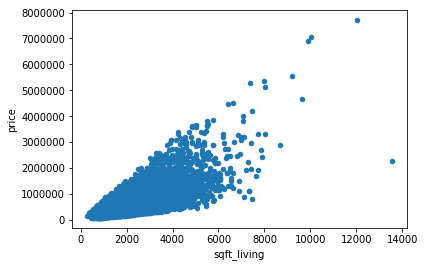

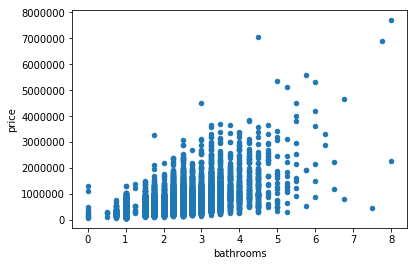

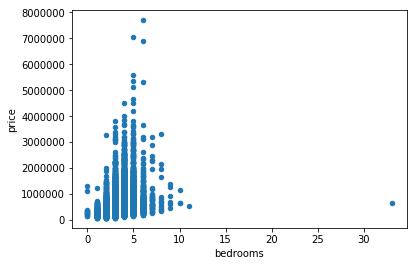

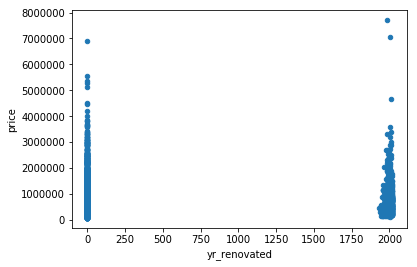

In [43]:
# Taking a closer look at four relationships in preparation for practicing a linear regression
df.plot.scatter('sqft_living','price')   
df.plot.scatter('bathrooms','price')   
df.plot.scatter('bedrooms','price')   
df.plot.scatter('yr_renovated','price')   

In [44]:
# Defining training and testing data
xTrain, xTest, yTrain, yTest = train_test_split(np.array(df['sqft_living'], dtype=pd.Series).reshape(-1,1), np.array(df['price'], dtype=pd.Series).reshape(-1,1), test_size=0.2)
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

# Fitting the model with the training data
linmodel = linear_model.LinearRegression()
linmodel.fit(xTrain,yTrain)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

R squared training 0.486
R squared testing 0.516


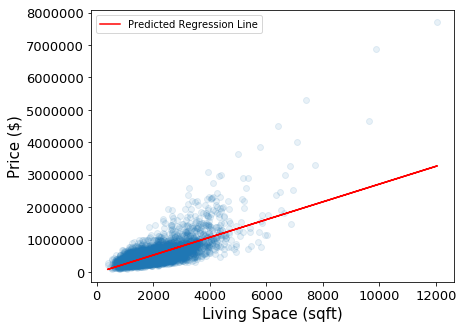

In [46]:
plt.figure(figsize=(6.5,5))
plt.scatter(xTest,yTest, alpha=.1)
plt.plot(xTest,linmodel.predict(xTest),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

# Calculating R-squared values to determine how closely the data fits to the fitted line. 
print('R squared training',round(linmodel.score(xTrain,yTrain),3))
print('R squared testing',round(linmodel.score(xTest,yTest),3) )